<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [ ]:
# Something new to install...
! pip install plotly

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [2]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [3]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [5]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [6]:
# Filter Data to Most Recent Year
df = df[df['year']==2007]

In [8]:
# Set Country to Index
df.set_index('country',inplace=True)

In [9]:
# Drop `iso_alpha`, `year`, and `iso_num`
df = df.drop(columns = ['iso_alpha','year','iso_num'])

In [10]:
# How many countries in each continent?
df['continent'].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [11]:
df.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964


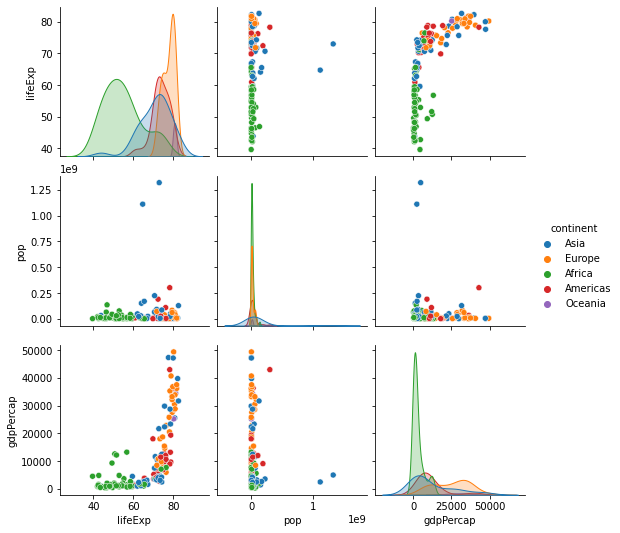

In [12]:
sns.pairplot(df,hue='continent')

In [13]:
# Get dummies!
df_dummy = pd.get_dummies(df,drop_first=True)


In [14]:
# Head (again!)

df_dummy.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,1,0,0
Albania,76.42300,3600523,5937.02953,0,0,1,0
Algeria,72.30100,33333216,6223.36747,0,0,0,0
Angola,42.73100,12420476,4797.23127,0,0,0,0
Argentina,75.32000,40301927,12779.37964,1,0,0,0


In [15]:
# Define X

X = df_dummy


In [16]:
# Scale Features
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### II. K-Means Clustering Model

In [17]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(X_sc)
    inertia_list.append(km.inertia_)
    
    

In [18]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(X_sc)
    silhouette_list.append(silhouette_score(X_sc,km.labels_))

#### Based off of our metrics above, which k should we try first?

Answer Here: K =6 is the optimal point, because it is the number of cluster where inertia tend to converge, also at that point the silhoutte score is high enough.



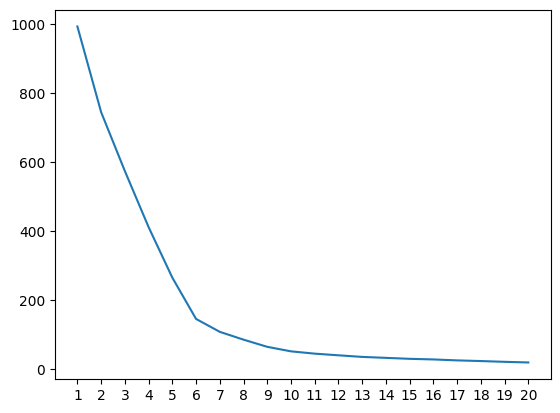

In [19]:
plt.plot(range(1,21),inertia_list)
plt.xticks(range(1,21));

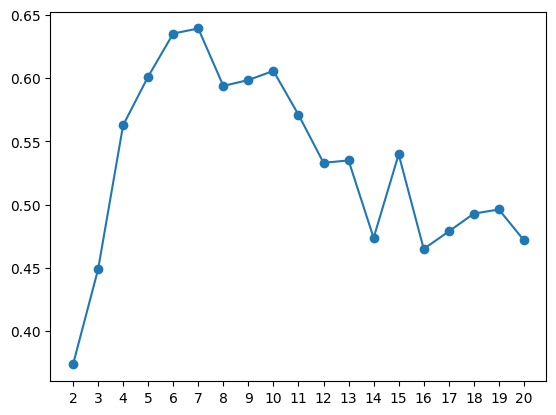

In [20]:
plt.plot(range(2,21),silhouette_list,marker='o')
plt.xticks(range(2,21));

In [21]:
# Now let's try it!
# Instantiate & Fit
km = KMeans(n_clusters=6)
km.fit(X_sc)

KMeans(n_clusters=6)

In [22]:
# Silhouette Score
silhouette_score(X_sc,km.labels_)

0.6350842772929556

#### Visualize Your Clusters!

In [23]:
# Add cluster column
df_dummy['km_cluster'] = km.labels_


In [24]:
pd.Series(km.labels_).unique()

array([5, 2, 0, 3, 1, 4], dtype=int32)

In [26]:
df_dummy['km_cluster_color'] = df_dummy['km_cluster'].map({0:'g',1:'b',2:'k',3:'y',4:'orange',5:'r'})

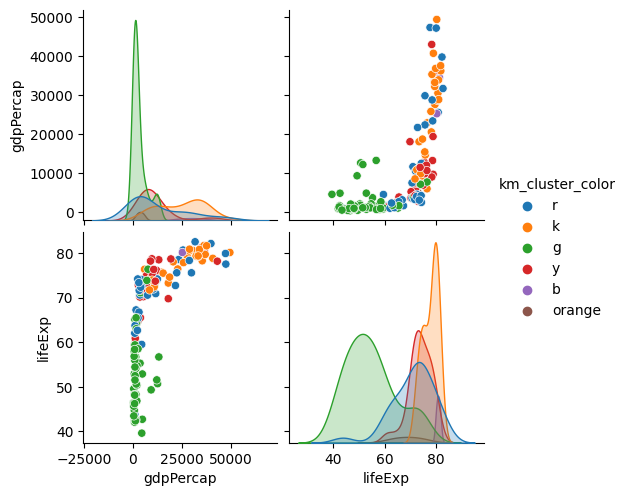

In [29]:
# Method 1: Pairplots/Scatterplots

sns.pairplot(df_dummy[['gdpPercap','lifeExp','km_cluster_color']],hue='km_cluster_color')

In [31]:
# Method 2: Groupby
df_dummy.groupby('km_cluster').agg(['count'])

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,km_cluster_color
,count,count,count,count,count,count,count,count
km_cluster,,,,,,,,
0,52,52,52,52,52,52,52,52
1,2,2,2,2,2,2,2,2
2,30,30,30,30,30,30,30,30
3,25,25,25,25,25,25,25,25
4,2,2,2,2,2,2,2,2
5,31,31,31,31,31,31,31,31


#### An Even Closer Look...Which countries are in each of these clusters?

In [33]:
# For loop
for i in df_dummy['km_cluster'].unique():
    print(f'This is the countries in cluster {i}\n')
    print(df_dummy[df_dummy['km_cluster'] == i].index)
    print('\n\n')


This is the countries in cluster 5

Index(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Malaysia',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.'],
      dtype='object', name='country')



This is the countries in cluster 2

Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom'],
      dtype='object', name='country')



This

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [291]:
eps,min_sam,score=[],[],[]

for i in np.arange(0.2,1.2,0.1):
    for j in range(1,8):
        dbscan = DBSCAN(eps=i,min_samples=j)
        dbscan.fit(X_sc)
        eps.append(i)
        min_sam.append(j)
        score.append(silhouette_score(X_sc,dbscan.labels_))



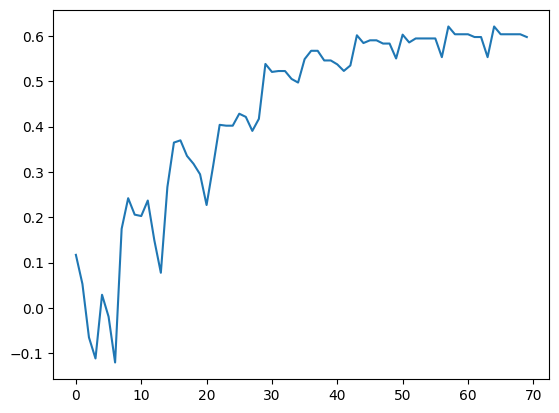

In [292]:
plt.plot(score)

In [293]:
silhoute_df = pd.DataFrame([eps,min_sam,score],index=['eps','min_sample','score']).T

In [294]:
silhoute_df.sort_values(by='score',ascending=False).head(4)
# eps 0.95 is the first eps that got highest silhouette score

,eps,min_sample,score
64,1.10000,2.00000,0.62060
57,1.00000,2.00000,0.62060
58,1.00000,3.00000,0.60344
59,1.00000,4.00000,0.60344


In [295]:
dbscan = DBSCAN(eps=1.1,min_samples=2)
dbscan.fit(X_sc)
df_dummy['cluster_dbscan']  = dbscan.labels_

In [296]:
pd.Series(dbscan.labels_).unique()

array([-1,  0,  1,  2,  3,  4])

In [298]:
df_dummy['dbscan_color'] = df_dummy['cluster_dbscan'].map({0:'g',1:'b',2:'k',3:'y',4:'orange',-1:'r'})

In [299]:
# df_dummy['dbscan_color'] = df_dummy['cluster_dbscan'].map({-1:'r',0:'g',1:'b',2:'k',3:'y',4:'orange'})

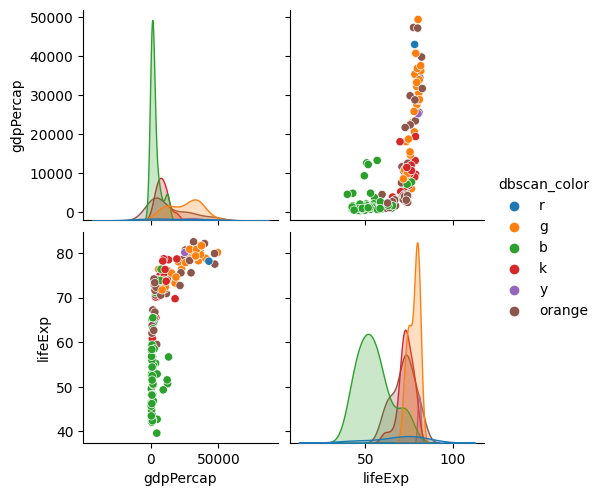

In [300]:
sns.pairplot(df_dummy[['gdpPercap','lifeExp','dbscan_color']],hue='dbscan_color')

In [301]:
df_dummy.groupby('cluster_dbscan').agg(['count'])

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,km_cluster,km_cluster_color,dbscan_color,continent,km_cluter_continent,km_cluster_continent,dbscan_continent
,count,count,count,count,count,count,count,count,count,count,count,count,count,count
cluster_dbscan,,,,,,,,,,,,,,
-1,5,5,5,5,5,5,5,5,5,5,5,0,5,5
0,30,30,30,30,30,30,30,30,30,30,30,0,30,30
1,52,52,52,52,52,52,52,52,52,52,52,0,52,52
2,23,23,23,23,23,23,23,23,23,23,23,0,23,23
3,2,2,2,2,2,2,2,2,2,2,2,0,2,2
4,30,30,30,30,30,30,30,30,30,30,30,0,30,30


In [302]:
for i in df_dummy['cluster_dbscan'].unique():
    print(f'This is the countries in cluster {i} \n')
    print(df_dummy[df_dummy['cluster_dbscan'] == i].index)
    print('\n\n')

This is the countries in cluster -1 

Index(['Afghanistan', 'Canada', 'China', 'India', 'United States'], dtype='object', name='country')



This is the countries in cluster 0 

Index(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom'],
      dtype='object', name='country')



This is the countries in cluster 1 

Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissa

In [303]:
# assign continent name to dummy
df_dummy['continent'] = df['continent']

In [304]:
# COMPARISON by plot

<AxesSubplot: xlabel='gdpPercap', ylabel='lifeExp'>

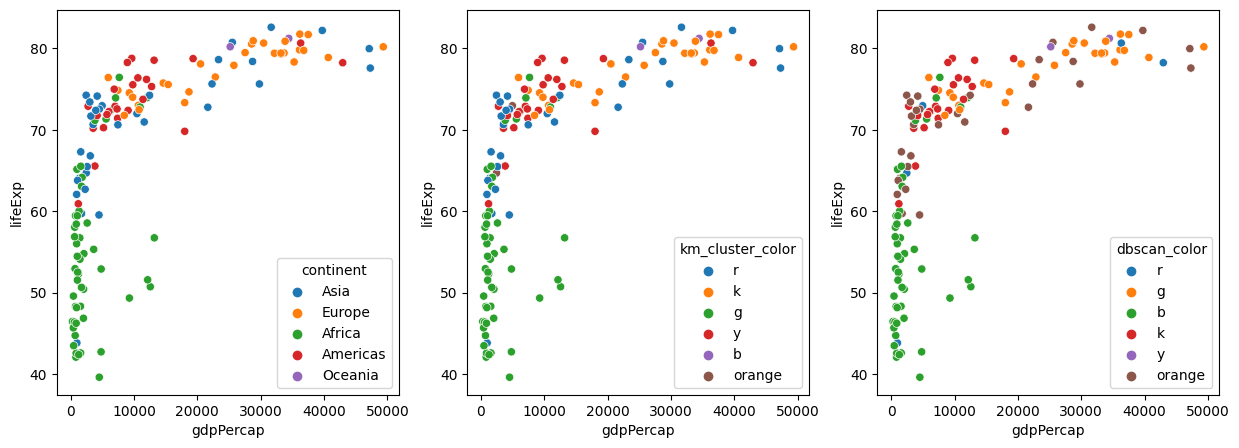

In [305]:
fig,ax =  plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x='gdpPercap',y='lifeExp',data = df_dummy,hue='continent',ax=ax[0])
sns.scatterplot(x='gdpPercap',y='lifeExp',data = df_dummy,\
                hue='km_cluster_color',ax=ax[1])
sns.scatterplot(x='gdpPercap',y='lifeExp',data = df_dummy,\
                hue='dbscan_color',ax=ax[2])

- With plotting can't distinguish by just eyerolling.

In [306]:
# Compare by groupby

In [307]:
# map continent label on KMEANS

df_dummy['km_cluster_continent'] = df_dummy['km_cluster'].map({5:'Asia',2:'Europe',0:'Africa',3:'Americas',1:'Oceania',4:'Outliers'})

In [308]:
# KMEANS
df_dummy.groupby('km_cluster_continent').count()['pop']

km_cluster_continent
Africa      52
Americas    25
Asia        31
Europe      30
Oceania      2
Outliers     2
Name: pop, dtype: int64

In [310]:
# map continent label on dbscan
df_dummy['dbscan_continent'] = df_dummy['cluster_dbscan'].map({0:'Europe',1:'Africa',2:'Americas',3:'Oceania',4:'Asia',-1:'Outlier'})

In [311]:
# DBSCAN
df_dummy.groupby('dbscan_continent').count()['pop']

dbscan_continent
Africa      52
Americas    23
Asia        30
Europe      30
Oceania      2
Outlier      5
Name: pop, dtype: int64

In [312]:
# REAL VALUEs
df_dummy.groupby('continent').count()['pop']

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: pop, dtype: int64

In [ ]:
# As from the comparing on values in each continent between 3 groups (KMEANS,DBSCAN,REAL):
# KMEANS cluster better than DBSCAN in this case, because there is no significant outlier in the data.

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 